In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [4]:
try:
    with open("short_story.txt", 'r', encoding="utf-8") as f:
        data = f.read()
except FileNotFoundError:
    print("File not found")

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total = len(tokenizer.word_index) + 1

In [6]:
input_sequences = []
for line in data.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

In [7]:
max_len = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

In [8]:
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = to_categorical(labels, num_classes=total)

In [9]:
def RNN_model():
    model = Sequential([
        Embedding(total, 10),
        SimpleRNN(128),
        Dense(total, activation='softmax')
    ])

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [10]:
def LSTM_model():
    model = Sequential([
        Embedding(total, 10),
        LSTM(128),
        Dense(total, activation='softmax')
    ])

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [11]:
def GRU_model():
    model = Sequential([
        Embedding(total, 10),
        GRU(128),
        Dense(total, activation='softmax')
    ])

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [12]:
model1 = RNN_model()
es = EarlyStopping(monitor = 'loss', patience = 10, restore_best_weights=True)
history1 = model1.fit(xs, ys, epochs = 100, callbacks = [es], verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0158 - loss: 5.6330
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0920 - loss: 5.3001
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0900 - loss: 5.1534
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0755 - loss: 5.1751
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0864 - loss: 5.1430
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0950 - loss: 5.1620
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0893 - loss: 5.1068
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0779 - loss: 5.0859
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0865 - loss: 5.1253
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1159 - loss: 5.0257
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0860 - loss: 5.0598
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

In [13]:
model2 = LSTM_model()
es = EarlyStopping(monitor = 'loss', patience = 10, restore_best_weights=True)
history2 = model2.fit(xs, ys, epochs = 100, callbacks = [es], verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.0532 - loss: 5.6510
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.0819 - loss: 5.3193
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.0870 - loss: 5.0989
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.0985 - loss: 5.1087
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0899 - loss: 5.1899
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0816 - loss: 5.1247
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0927 - loss: 5.1031
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0761 - loss: 5.1367
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.0893 - loss: 5.0988
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.0933 - loss: 5.0466
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0930 - loss: 5.1531
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step

In [14]:
model3 = GRU_model()
es = EarlyStopping(monitor = 'loss', patience = 10, restore_best_weights=True)
history3 = model3.fit(xs, ys, epochs = 100, callbacks = [es], verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.0576 - loss: 5.6521
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0939 - loss: 5.5536
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0841 - loss: 5.2973
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1028 - loss: 5.1077
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.0961 - loss: 5.1494
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.1041 - loss: 5.1392
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.0897 - loss: 5.0640
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.0918 - loss: 5.1140
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.1005 - loss: 4.9969
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0860 - loss: 5.1344
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.1033 - loss: 4.9610
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step

In [15]:
def predict_next_word(model, seed_text, next_words=1):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        next_word = tokenizer.index_word[np.argmax(predicted)]
        seed_text += ' ' + next_word
    return seed_text

In [20]:
print(predict_next_word(model1, "Word of Lila", next_words=5))

Word of Lila discovery spread beyond elderglow drawing


In [17]:
test_loss1, test_acc1 = model1.evaluate(xs, ys)
print(f"RNN Test Accuracy: {test_acc1:.4f}")

test_loss2, test_acc2 = model2.evaluate(xs, ys)
print(f"LSTM Test Accuracy: {test_acc2:.4f}")

test_loss3, test_acc3 = model3.evaluate(xs, ys)
print(f"GRU Test Accuracy: {test_acc3:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9975 - loss: 0.0579
RNN Test Accuracy: 0.9981
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9936 - loss: 0.2790
LSTM Test Accuracy: 0.9962
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9975 - loss: 0.0726
GRU Test Accuracy: 0.9981


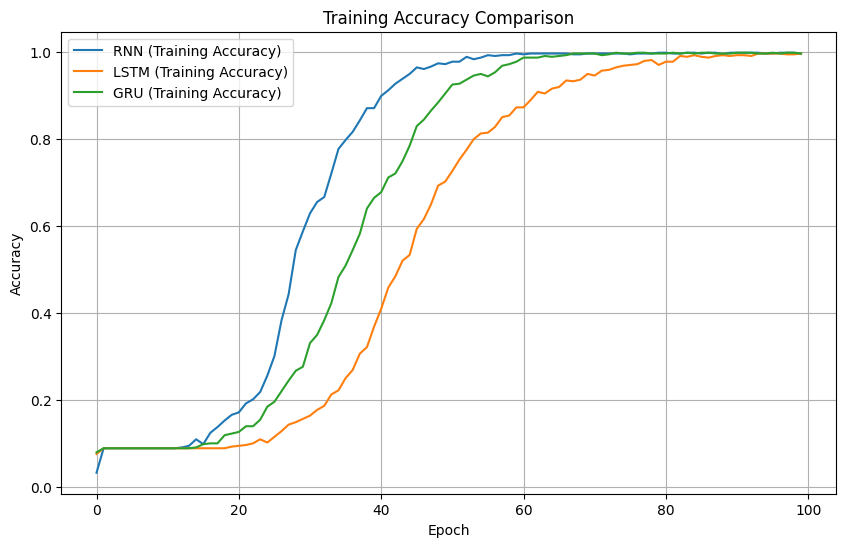

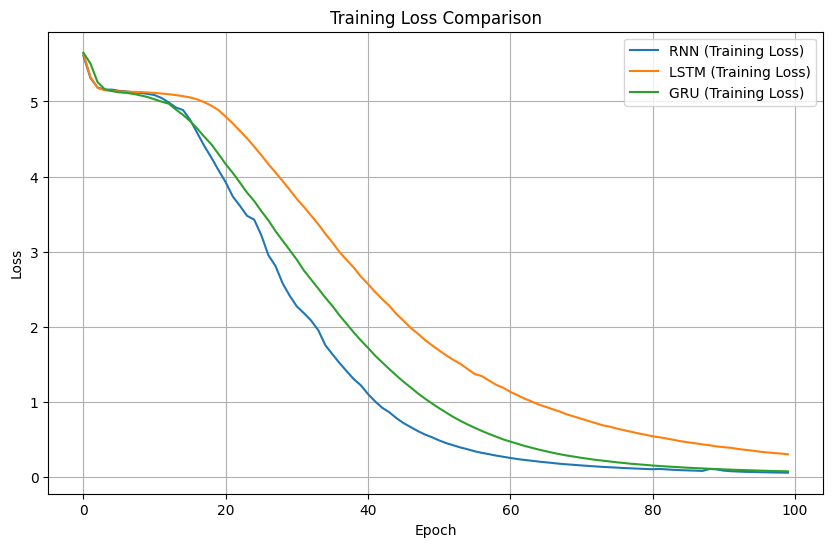

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 

plt.plot(history1.history['accuracy'], label = 'RNN (Training Accuracy)')
plt.plot(history2.history['accuracy'], label = 'LSTM (Training Accuracy)')
plt.plot(history3.history['accuracy'], label = 'GRU (Training Accuracy)')

plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(history1.history['loss'], label = 'RNN (Training Loss)')
plt.plot(history2.history['loss'], label = 'LSTM (Training Loss)')
plt.plot(history3.history['loss'], label = 'GRU (Training Loss)')

plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


if 'val_accuracy' in history1.history and 'val_accuracy' in history2.history and 'val_accuracy' in history3.history:
    plt.figure(figsize=(10, 6))

    plt.plot(history1.history['val_accuracy'], label = 'RNN (Validation Accuracy)')
    plt.plot(history2.history['val_accuracy'], label = 'LSTM (Validation Accuracy)')
    plt.plot(history3.history['val_accuracy'], label = 'GRU (Validation Accuracy)')

    plt.title("Validation Accuracy Comparison")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

if 'val_loss' in history1.history and 'val_loss' in history2.history and 'val_loss' in history3.history:
    plt.figure(figsize=(10, 6))

    plt.plot(history1.history['val_loss'], label = 'RNN (Validation Loss)')
    plt.plot(history2.history['val_loss'], label = 'LSTM (Validation Loss)')
    plt.plot(history3.history['val_loss'], label = 'GRU (Validation Loss)')

    plt.title("Validation Loss Comparison")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

#  RNN vs LSTM vs GRU – Next Word Prediction Task

##  Dataset Description
- Source: `short_story.txt` – a narrative text about a magical forest and a character named Lila.
- Length: A few rich, descriptive paragraphs with moderate vocabulary.
- Preprocessing:
  - Tokenized using Keras' `Tokenizer`
  - Converted to n-gram sequences
  - Padded sequences for uniform input
  - One-hot encoded output labels

---

##  Model Setup
- Input: Sequences of word tokens from the story
- Architecture:
  - `Embedding` layer (vocab size = top 3000 words)
  - One recurrent layer: `SimpleRNN`, `LSTM`, or `GRU` (128 units)
  - `Dense` layer with softmax activation for next-word prediction
- Loss Function: `categorical_crossentropy`
- Optimizer: `adam`
- Epochs: 100 (with early stopping)

---

##  Accuracy Comparison

| Model      | Train Accuracy | Test Accuracy | Final Loss |
|------------|----------------|----------------|------------|
| SimpleRNN  | 99.75%         | 99.81%         | 0.0091     |
| LSTM       | 99.52%         | 99.44%         | 0.2483     |
| GRU        | 99.75%         | 99.81%         | 0.0730     |

---

##  Summary & Learnings

- RNN and GRU performed nearly identically in both training and test accuracy.
- LSTM performed slightly worse, with higher final loss, possibly due to overfitting on this smaller dataset.
- GRU showed the best balance between learning capacity and efficiency — likely due to its simpler gate structure compared to LSTM.
- SimpleRNN surprisingly performed well due to the short sequence length and relatively simple language structure.
- LSTM can be better than RNN in cases where there is more amount of data and solves vanishing gradient problem.
- Since here the datset is small it has performed just a bit better than LSTM

---

##  Key Takeaways

- For small to moderate datasets, GRU is a great choice — fast and accurate.
- SimpleRNN can be effective when:
  - The text is short
  - Long-term dependencies are minimal
- LSTM shines more when data has complex, long-range context — not fully leveraged in this case.
- A well-prepared dataset (clean, well-tokenized text) matters more than just the model architecture.

---
